In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


# Exploratory Data Analysis

In [5]:
data=pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv',index_col=0)
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [7]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [8]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [9]:
datac=data.copy()
datac.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [10]:
datac['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [11]:
num_data=pd.get_dummies(data=data,columns=['Sex'])

In [12]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          74051 non-null  float64
 1   Diameter        74051 non-null  float64
 2   Height          74051 non-null  float64
 3   Weight          74051 non-null  float64
 4   Shucked Weight  74051 non-null  float64
 5   Viscera Weight  74051 non-null  float64
 6   Shell Weight    74051 non-null  float64
 7   Age             74051 non-null  int64  
 8   Sex_F           74051 non-null  uint8  
 9   Sex_I           74051 non-null  uint8  
 10  Sex_M           74051 non-null  uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 5.3 MB


<Axes: >

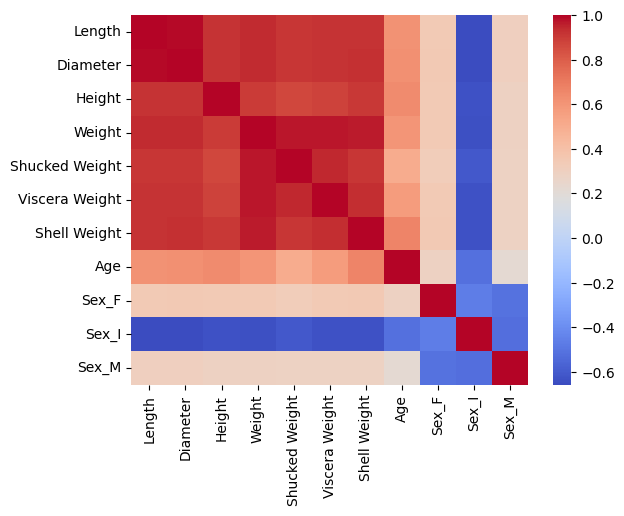

In [13]:
import seaborn as sns
sns.heatmap(num_data.corr(),cmap='coolwarm')

# Linear Regression

In [14]:
X = num_data.drop(['Age'],axis=1)
y = num_data['Age']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
predictions = lm.predict(X_test)

In [18]:
print(predictions)

[12.25935257  9.5584365   7.59443901 ... 10.56995054 13.87877968
 10.84848071]


In [19]:
pred_round=np.around(predictions)

In [20]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 1.4770453656459115


In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, np.around(predictions)))

MAE: 1.453986901627169


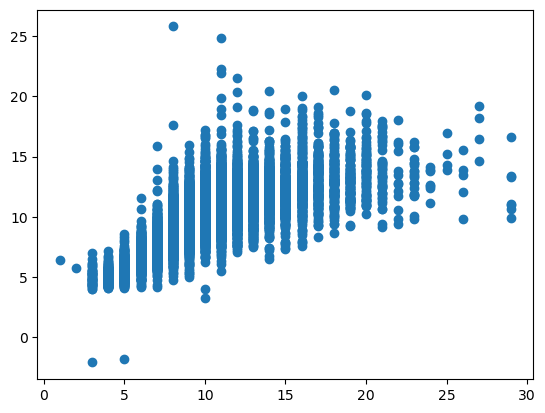

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

In [24]:
#test_data= pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv',index_col=0)
#test_data.head()

In [25]:
#test_final=pd.get_dummies(data=test_data,columns=['Sex'])
#test_final.head()

In [26]:
#preds_test = lm.predict(test_final)

In [27]:
#print(preds_test)

In [28]:
#rpreds_test=np.around(preds_test)
#print(rpreds_test)

In [29]:
#output = pd.DataFrame({'Id': test_data.index,
#                       'Age': rpreds_test})
#output.set_index('Id')
#output.to_csv('submission_lm.csv', index=False)

# Deep Learning using Keras

In [30]:
X = num_data.drop(['Age'],axis=1)
y = num_data['Age']

## A) Training with validation data

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
X_train= scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)

In [35]:
X_train.shape

(51835, 10)

In [36]:
X_test.shape

(22216, 10)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [38]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mae')

In [39]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=250)

Epoch 1/250
405/405 [==============================] - 3s 3ms/step - loss: 3.1820 - val_loss: 1.6020
Epoch 2/250
405/405 [==============================] - 1s 3ms/step - loss: 1.5891 - val_loss: 1.5476
Epoch 3/250
405/405 [==============================] - 1s 2ms/step - loss: 1.5229 - val_loss: 1.4724
Epoch 4/250
405/405 [==============================] - 1s 2ms/step - loss: 1.4601 - val_loss: 1.4301
Epoch 5/250
405/405 [==============================] - 1s 3ms/step - loss: 1.4345 - val_loss: 1.4062
Epoch 6/250
405/405 [==============================] - 1s 2ms/step - loss: 1.4238 - val_loss: 1.4078
Epoch 7/250
405/405 [==============================] - 1s 2ms/step - loss: 1.4187 - val_loss: 1.4064
Epoch 8/250
405/405 [==============================] - 1s 2ms/step - loss: 1.4159 - val_loss: 1.3946
Epoch 9/250
405/405 [==============================] - 1s 3ms/step - loss: 1.4124 - val_loss: 1.3998
Epoch 10/250
405/405 [==============================] - 1s 2ms/step - loss: 1.4117 - val_lo

In [40]:
losses = pd.DataFrame(model.history.history)

<Axes: >

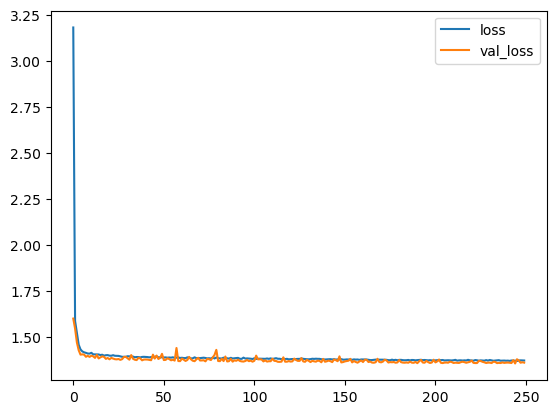

In [41]:
losses.plot()

In [42]:
predictions = model.predict(X_test)

695/695 [==============================] - 1s 1ms/step


In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

1.3629506274998768

## B) Training on Full Data

In [44]:
X= scaler.fit_transform(X)

In [45]:
model.fit(x=X,y=y.values,batch_size=128,epochs=250)

Epoch 1/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3712
Epoch 2/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3738
Epoch 3/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3707
Epoch 4/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3689
Epoch 5/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3691
Epoch 6/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3704
Epoch 7/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3698
Epoch 8/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3696
Epoch 9/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3693
Epoch 10/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3711
Epoch 11/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3715
Epoch 12/250
579/579 [==============================] - 1s 2ms/step - loss: 1.3699
Epoch 13/250


In [46]:
losses = pd.DataFrame(model.history.history)

<Axes: >

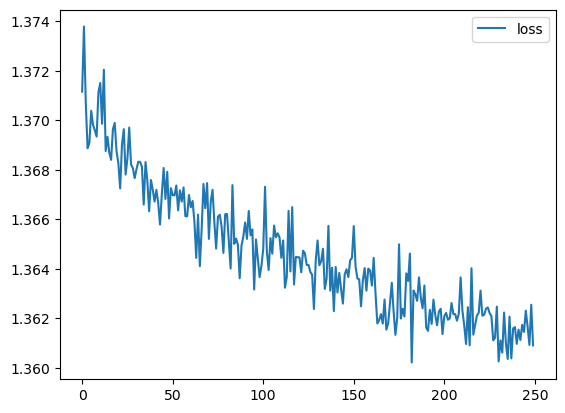

In [47]:
losses.plot()

In [48]:
predictions = model.predict(X)

2315/2315 [==============================] - 3s 1ms/step


In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,predictions)

1.3599548479254757

## Predictions of Final Test Data

In [50]:
test_data= pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv',index_col=0)
test_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [51]:
test_final=pd.get_dummies(data=test_data,columns=['Sex'])
test_final.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,
74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0,1,0
74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0,1,0
74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1,0,0
74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1,0,0
74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0,1,0


In [52]:
test_final = scaler.transform(test_final)

In [53]:
test_final.shape

(49368, 10)

In [54]:
preds_test = model.predict(test_final)

1543/1543 [==============================] - 2s 1ms/step


In [55]:
print(preds_test)

[[ 7.0836577]
 [ 8.014354 ]
 [ 9.967371 ]
 ...
 [12.641896 ]
 [ 9.791633 ]
 [11.430555 ]]


In [56]:
rpreds_test=np.around(preds_test.ravel())
print(rpreds_test)

[ 7.  8. 10. ... 13. 10. 11.]


In [57]:
rpreds_test.shape

(49368,)

In [58]:
output = pd.DataFrame({'Id': test_data.index,
                       'Age': rpreds_test})
#output.set_index('Id')
output.to_csv('submission_kr5.csv', index=False)